In [122]:
# Part 1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

def loadData():
    with np.load('notMNIST.npz') as dataset:
        Data, Target = dataset['images'], dataset['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

[trainData, validData, testData, trainTarget, validTarget, testTarget] = loadData()

print(len(trainData))
print(len(validData))
print(len(testData))

def loss(w, b, x, y, reg):
    num_example = x.shape[0]
    num_dimension = x.shape[1] * x.shape[2]
    w = w.reshape((num_dimension, 1))
    x = x.reshape((num_example, num_dimension))
    # Your implementation here
    #z = np.matmul(x,w)+b
    z = np.dot(x,w)+b
    y_hat = 1.0 / ( 1.0 + np.exp(-(z)) )
    loss = ( np.sum(-(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))) )/( np.shape(y)[0] ) + reg / 2*np.sum( w*w )
    return loss

def grad_loss(w, b, x, y, reg):
    # Your implementation here
    z = np.matmul(x, w) + b
    y_hat = 1.0/(1.0+np.exp(-z))
    grad_w = np.dot( x.T, y_hat - y ) / len( y ) + ( reg * w )
    grad_b = np.sum((y_hat - y)) / len(y)
    # grad_b = np.sum((y_hat - y))/(np.shape(y)[0])
    return grad_w, grad_b
 
def grad_descent(w, b, x, y, alpha, epochs, reg, error_tol=1e-7):
    # Your implementation here
    for i in range(epochs):
      grad_w, grad_b = loss(w, b, x, y ,reg)
      w_new = w - alpha * grad_w
      b_new = b - alpha * grad_b
      diff = np.linalg.norm(w_new - w)
      if diff < error_tol:
        return w_new, b_new
      else:
        w = w_new
        b = b_new
    return w, b


3500
100
145


'  \ndef grad_descent(w, b, x, y, alpha, epochs, reg, error_tol=1e-7):\n    # Your implementation here\n    for i in range(epochs):\n      grad_w, grad_b = loss(w, b, x, y ,reg)\n      w_new = w - alpha * grad_w\n      b_new = b - alpha * grad_b\n      diff = np.linalg.norm(w_new - w)\n      if diff < error_tol:\n        return w_new, b_new\n      else:\n        w = w_new\n        b = b_new\n    return w, b\n'

In [81]:
def plot_loss(train_loss, valid_loss):
    print("train len:", len(train_loss))
    print("valid len:", len(valid_loss))
    train_label = "Train"
    valid_label = "Validation"
    plt.title("Train vs Validation Loss")
    n = len(train_loss) # number of epochs
    plt.plot(range(1,n+1), train_loss, label=train_label)
    plt.plot(range(1,n+1), valid_loss, label=valid_label)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.grid()

def plot_accuracy(train_accuracy, valid_accuracy):
    train_label = "Train"
    valid_label = "Validation"
    plt.title("Train vs Validation Accuracy")
    n = len(train_accuracy) # number of epochs
    plt.plot(range(1,n+1), train_accuracy, label=train_label)
    plt.plot(range(1,n+1), valid_accuracy, label=valid_label)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.grid()

In [82]:
# grad descent with more input and output
def grad_descent(w, b, trainingData, trainingLabels, alpha, epochs, reg, error_tol,
                 validData, testData, validTarget, testTarget):
  
    train_loss = [loss(w, b, trainingData, trainingLabels, reg)]
    valid_loss = [loss(w, b, validData, validTarget, reg)]
    test_loss = [loss(w, b, testData, testTarget, reg)]

    out_train = np.matmul(trainData, w)+b
    train_accur = [np.sum((out_train>=0.5)==trainTarget)/(trainData.shape[0])]

    out_valid = np.matmul(validData,w)+b
    valid_accur = [np.sum((out_valid>=0.5)==validTarget)/(validTarget.shape[0])]

    out_test = np.matmul(testData,w)+b
    test_accur = [np.sum((out_test>=0.5)==testTarget)/(testData.shape[0])]
    
    for i in range(epochs):
        grad_w, grad_b = grad_loss(w, b, trainingData, trainingLabels, reg)
        w_new = w - alpha * grad_w
        b_new = b - alpha * grad_b
        train_loss.append(loss(w_new, b_new, trainingData, trainingLabels, reg))
        valid_loss.append(loss(w_new, b_new, validData, validTarget, reg))
        test_loss.append(loss(w_new, b_new, testData, testTarget, reg))
        out_train = np.matmul(trainData, w_new) + b_new
        train_accur.append(np.sum((out_train>=0.5)==trainTarget)/(trainData.shape[0]))

        out_valid = np.matmul(validData, w_new) + b_new
        valid_accur.append(np.sum((out_valid>=0.5)==validTarget)/(validTarget.shape[0]))

        out_test = np.matmul(testData, w_new) + b_new
        test_accur.append(np.sum((out_test>=0.5)==testTarget)/(testData.shape[0]))

        if np.linalg.norm(w_new - w) < error_tol:
            return w_new, b_new, train_loss, valid_loss, test_loss, train_accur, valid_accur, test_accur
        else:
            w = w_new
            b = b_new
    return w, b, train_loss, valid_loss, test_loss, train_accur, valid_accur, test_accur

train_len: 3500
valid_len: 100
test_len: 145
Training data accuracy:  0.9628571428571429
Valid data accuracy:  0.97
Test data accuracy:  0.9655172413793104
train len: 5001
valid len: 5001


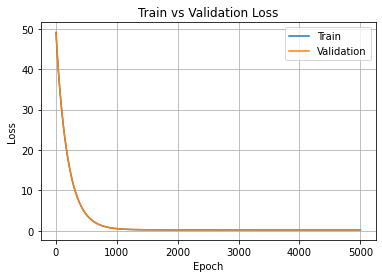

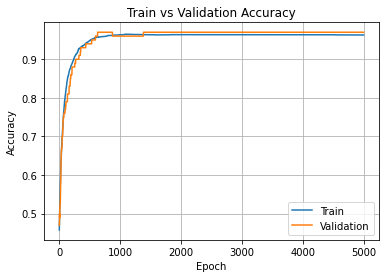

In [83]:
if __name__ == '__main__': 
    # load data from npz
    trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
    trainData = trainData.reshape((trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
    validData = validData.reshape((-1,validData.shape[1]*validData.shape[2])) 
    testData = testData.reshape((-1,testData.shape[1]*testData.shape[2]))

    # mean and stdv
    w = np.random.normal(0, 0.5, (trainData.shape[1],1))
    b = 0

    # parameters
    error_tol = 1e-7
    epochs = 5000
    reg = 0.5
    alpha_1 = 0.005

    # gradient descent function
    w, b, train_loss, valid_loss, test_loss, train_accur, valid_accur, test_accur = grad_descent(w, b, trainData, trainTarget, alpha_1, epochs, reg, error_tol, validData, testData, validTarget, testTarget)
    
    # accuracy
    out = np.matmul(trainData, w) + b
    out_valid = np.matmul(validData, w) + b
    out_test = np.matmul(testData, w) + b
    train_len = trainData.shape[0]
    valid_len = validData.shape[0]
    test_len = testData.shape[0]
    # print("train_len:", train_len)
    # print("valid_len:", valid_len)
    # print("test_len:", test_len)

    # print results
    training_acc = np.sum((out >= 0.5) == trainTarget)/(train_len)
    print("Training data accuracy: ", training_acc)
    valid_acc = np.sum((out_valid >= 0.5) == validTarget)/(valid_len)
    print("Valid data accuracy: ", valid_acc)
    test_acc = np.sum((out_test >= 0.5) == testTarget)/(test_len)
    print("Test data accuracy: ", test_acc)
    
    # plots
    plot_loss(train_loss, valid_loss)
    plt.show()
    plot_accuracy(train_accur, valid_accur)
    plt.show()

Instructions for updating:
non-resource variables are not supported in the long term


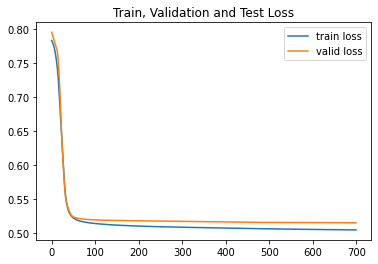

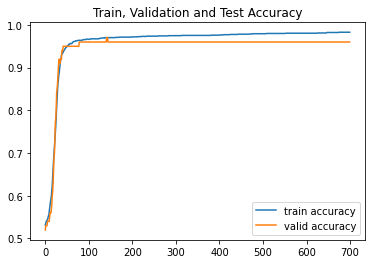

In [1]:
# Part 2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
# Add the import statements 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Change it to the sample expression as follows. 
# init = tf.compat.v1.random.truncated_normal()

def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

def accuracy(predictions, labels):
    return (np.sum((predictions>=0.5)==labels) / np.shape(predictions)[0])


def buildGraph(batch_size, learning_rate=0.001, beta1=0.9, beta2=0.999, error_tol=1e-07):
  tf.set_random_seed(421)
  # initialize w, b, loss, optimizer
  w = tf.Variable(tf.truncated_normal(dtype=tf.float32, shape=(28*28, 1), mean=0.0, stddev=0.5))
  b = tf.Variable(tf.zeros(1))
  x = tf.placeholder(dtype=tf.float32, shape=(batch_size, 28*28), name='x')
  y = tf.placeholder(dtype=tf.float32, shape=(batch_size, 1), name='y')
  predicted_labels = tf.sigmoid(tf.matmul(x, w) + b)
  loss = tf.losses.sigmoid_cross_entropy(y, predicted_labels)
  optimizer = tf.train.AdamOptimizer(learning_rate, beta1, beta2, error_tol).minimize(loss)
  reg = tf.nn.l2_loss(w)
  
  return w, b, predicted_labels, x, y, loss, optimizer, reg

def SGD(batch_size, epochs=700, learning_rate=0.001, beta1=0.9, beta2=0.999, error_tol=1e-07):
  beta = 0
  graph = tf.Graph()

  with graph.as_default():
    # call buildGraph for returned values
    w, b, predicted_labels, x, y, loss, optimizer, reg = buildGraph(batch_size)
    
    # initialize for valid and test
    valid_data = tf.placeholder(tf.float32, shape=(100, 28*28))
    valid_label = tf.placeholder(tf.int8, shape=(100, 1))

    test_data = tf.placeholder(tf.float32, shape=(145, 28*28))
    test_label = tf.placeholder(tf.int8, shape=(145, 1))

    # valid and test predict
    logits = tf.matmul(valid_data,w) + b 
    valid_prediction = tf.sigmoid(tf.matmul(valid_data, w) + b)
    valid_loss = tf.losses.sigmoid_cross_entropy(valid_label, valid_prediction)
    reg = tf.nn.l2_loss(w)
    valid_loss = valid_loss + beta/2.0 * reg

    logits = tf.matmul(test_data,w) + b 
    test_prediction = tf.sigmoid(tf.matmul(test_data, w) + b)
    test_loss = tf.losses.sigmoid_cross_entropy(test_label, test_prediction)
    reg = tf.nn.l2_loss(w)
    test_loss = test_loss + beta/2.0 * reg
    
    # open a session for graph
    with tf.Session(graph=graph) as session:
      tf.global_variables_initializer().run()
      # ini
      train_loss = []
      valid_loss = []
      test_loss = []
      train_accur = []
      valid_accur = []
      test_accur = []

      batches = int(3500/batch_size)
      
      
      for epoch in range(epochs): 
        trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
        trainData = trainData.reshape((trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
        validData = validData.reshape((-1,validData.shape[1]*validData.shape[2])) 
        testData = testData.reshape((-1,testData.shape[1]*testData.shape[2]))

        for batch in range(batches):
          # save space
          batchX = trainData[batch * batch_size: (batch+1) * batch_size,]
          batchY = trainTarget[batch * batch_size: (batch+1) * batch_size]
          
          # run session
          _, trainedW, trainedB, trainLoss, trainPrediction, validLoss, validPrediction, testLoss, testPrediction = session.run(
          [optimizer, w, b, loss, predicted_labels, valid_loss, valid_prediction, test_loss, test_prediction], 
          {x: batchX, 
          y: batchY,
          valid_data: validData,
          valid_label: validTarget,
          test_data: testData,
          test_label: testTarget})
                      
        if (epoch % 1 == 0): # if epoch iteration finished
          # append accuracy
          train_accur.append(accuracy(trainPrediction, batchY))
          valid_accur.append(accuracy(validPrediction, validTarget))
          test_accur.append(accuracy(testPrediction, testTarget))
          # append loss
          train_loss.append(trainLoss)
          valid_loss.append(validLoss)
          test_loss.append(testLoss)

    x_range = range(epochs)   # 700

    # plot accuracy
    plt.title("Train, Validation and Test Accuracy")
    plt.plot(x_range,train_accur)
    plt.plot(x_range,valid_accur)
    plt.plot(x_range,test_accur)
    plt.legend(['train accuracy', 'valid accuracy', 'test accuracy'], loc='lower right')
    plt.show()
    #print("Final Train Accuracy:", train_accur[epochs-1])
    #print("Final Validation Accuracy:", valid_accur[epochs-1])
    #print("Final Test Accuracy:", test_accur[epochs-1])

    # plot loss
    plt.title("Train, Validation and Test Loss")
    plt.plot(x_range,train_loss)
    plt.plot(x_range,valid_loss)
    plt.plot(x_range,test_loss)
    plt.legend(['train loss', 'valid loss', 'test loss'], loc='upper right')
    plt.show()
    #print("Final Train Loss:", train_loss[epochs-1])
    #print("Final Validation Loss:", valid_loss[epochs-1])
    #print("Final Test Accuracy:", test_loss[epochs-1])
    
    return trainedW, trainedB, (predictions>=0.5), trainTarget, trainLoss, optimizer, reg


trainedW, trainedB, predictions, trainTarget, trainLoss, optimizer, reg = SGD(batch_size=1750, epochs=700, learning_rate=0.001, beta1=0.9, beta2=0.999, error_tol=1e-07)